In [46]:
# Install libraries
%pip install scikit-learn
%pip install statsmodels
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [47]:
# Import libraries
import pandas as pd
import sklearn

In [48]:
# Import data
data = pd.read_csv("/Users/linhphung/Documents/Others/DS Projects/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [49]:
# Drop missing values
data.dropna(inplace=True)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 1. Linear Regression

In [51]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [52]:
# Selecting features and target variable
X = data.iloc[:, :6]  # Features
y = data['charges']   # Target variable

In [53]:
# Transform categorical variables into dummy variables (1 category is hidden)
X = pd.get_dummies(data=X, drop_first=True)
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [61]:
# Initialize the linear regression model
linear_reg = LinearRegression()

# Fit the model to the data
linear_reg.fit(X, y)

LinearRegression()

In [58]:
# The coefficients
coeff_parameter = pd.DataFrame(linear_reg.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
age,256.856353
bmi,339.193454
children,475.500545
sex_male,-131.314359
smoker_yes,23848.534542
region_northwest,-352.963899
region_southeast,-1035.022049
region_southwest,-960.050991


In [56]:
# Get regression result table like R
import statsmodels.formula.api as smf
r_reg =  smf.ols(' charges ~ age + sex + bmi +children + smoker + region', data=data)
r_reg = r_reg.fit()
r_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:18:20   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
sex[T.male]          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker[T.yes]        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region[T.northwest]  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region[T.southeast] -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region[T.southwest]  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
age                   256.8564     11.899     21.587      0.000     233.514     280.199
bmi                   339.1935     28.599     11.860      0.000     283.088     395.298
children              475.5005    137.804      3.451      0.001     205.163     745.838
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Model Diagnostics

In [63]:
import seaborn as sns # library for visualisation
import matplotlib.pyplot as plt
import numpy as np

<Axes: ylabel='Count'>

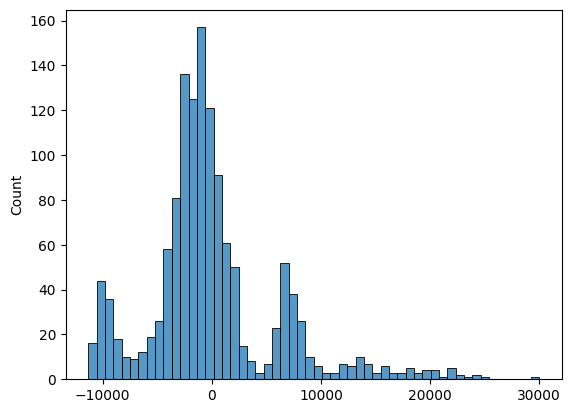

In [60]:
# Histogram of residuals
sns.histplot(r_reg.resid)

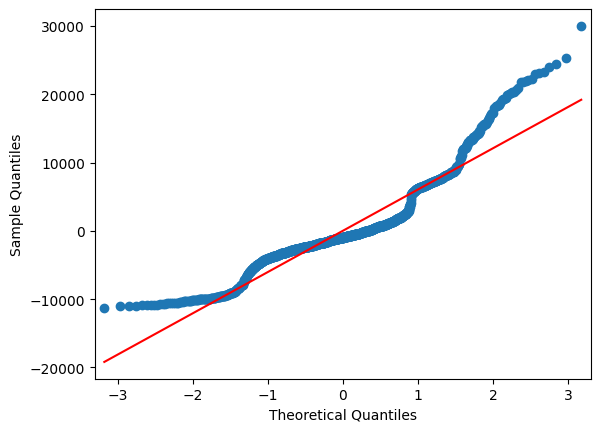

In [62]:
## Q-Q plot
sm.qqplot(r_reg.resid, line='s');

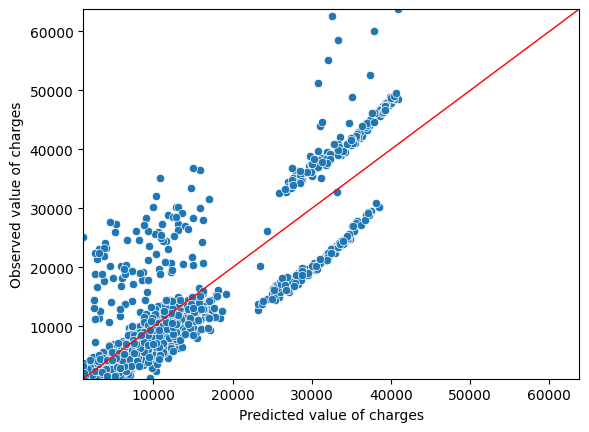

In [68]:
# Fit plot
Y_max = y.max()
Y_min = y.min()

data = pd.DataFrame({'Predicted': r_reg.fittedvalues, 'Observed': y})

ax = sns.scatterplot(data=data, x='Predicted', y='Observed')
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of charges")
ax.set_ylabel("Observed value of charges")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

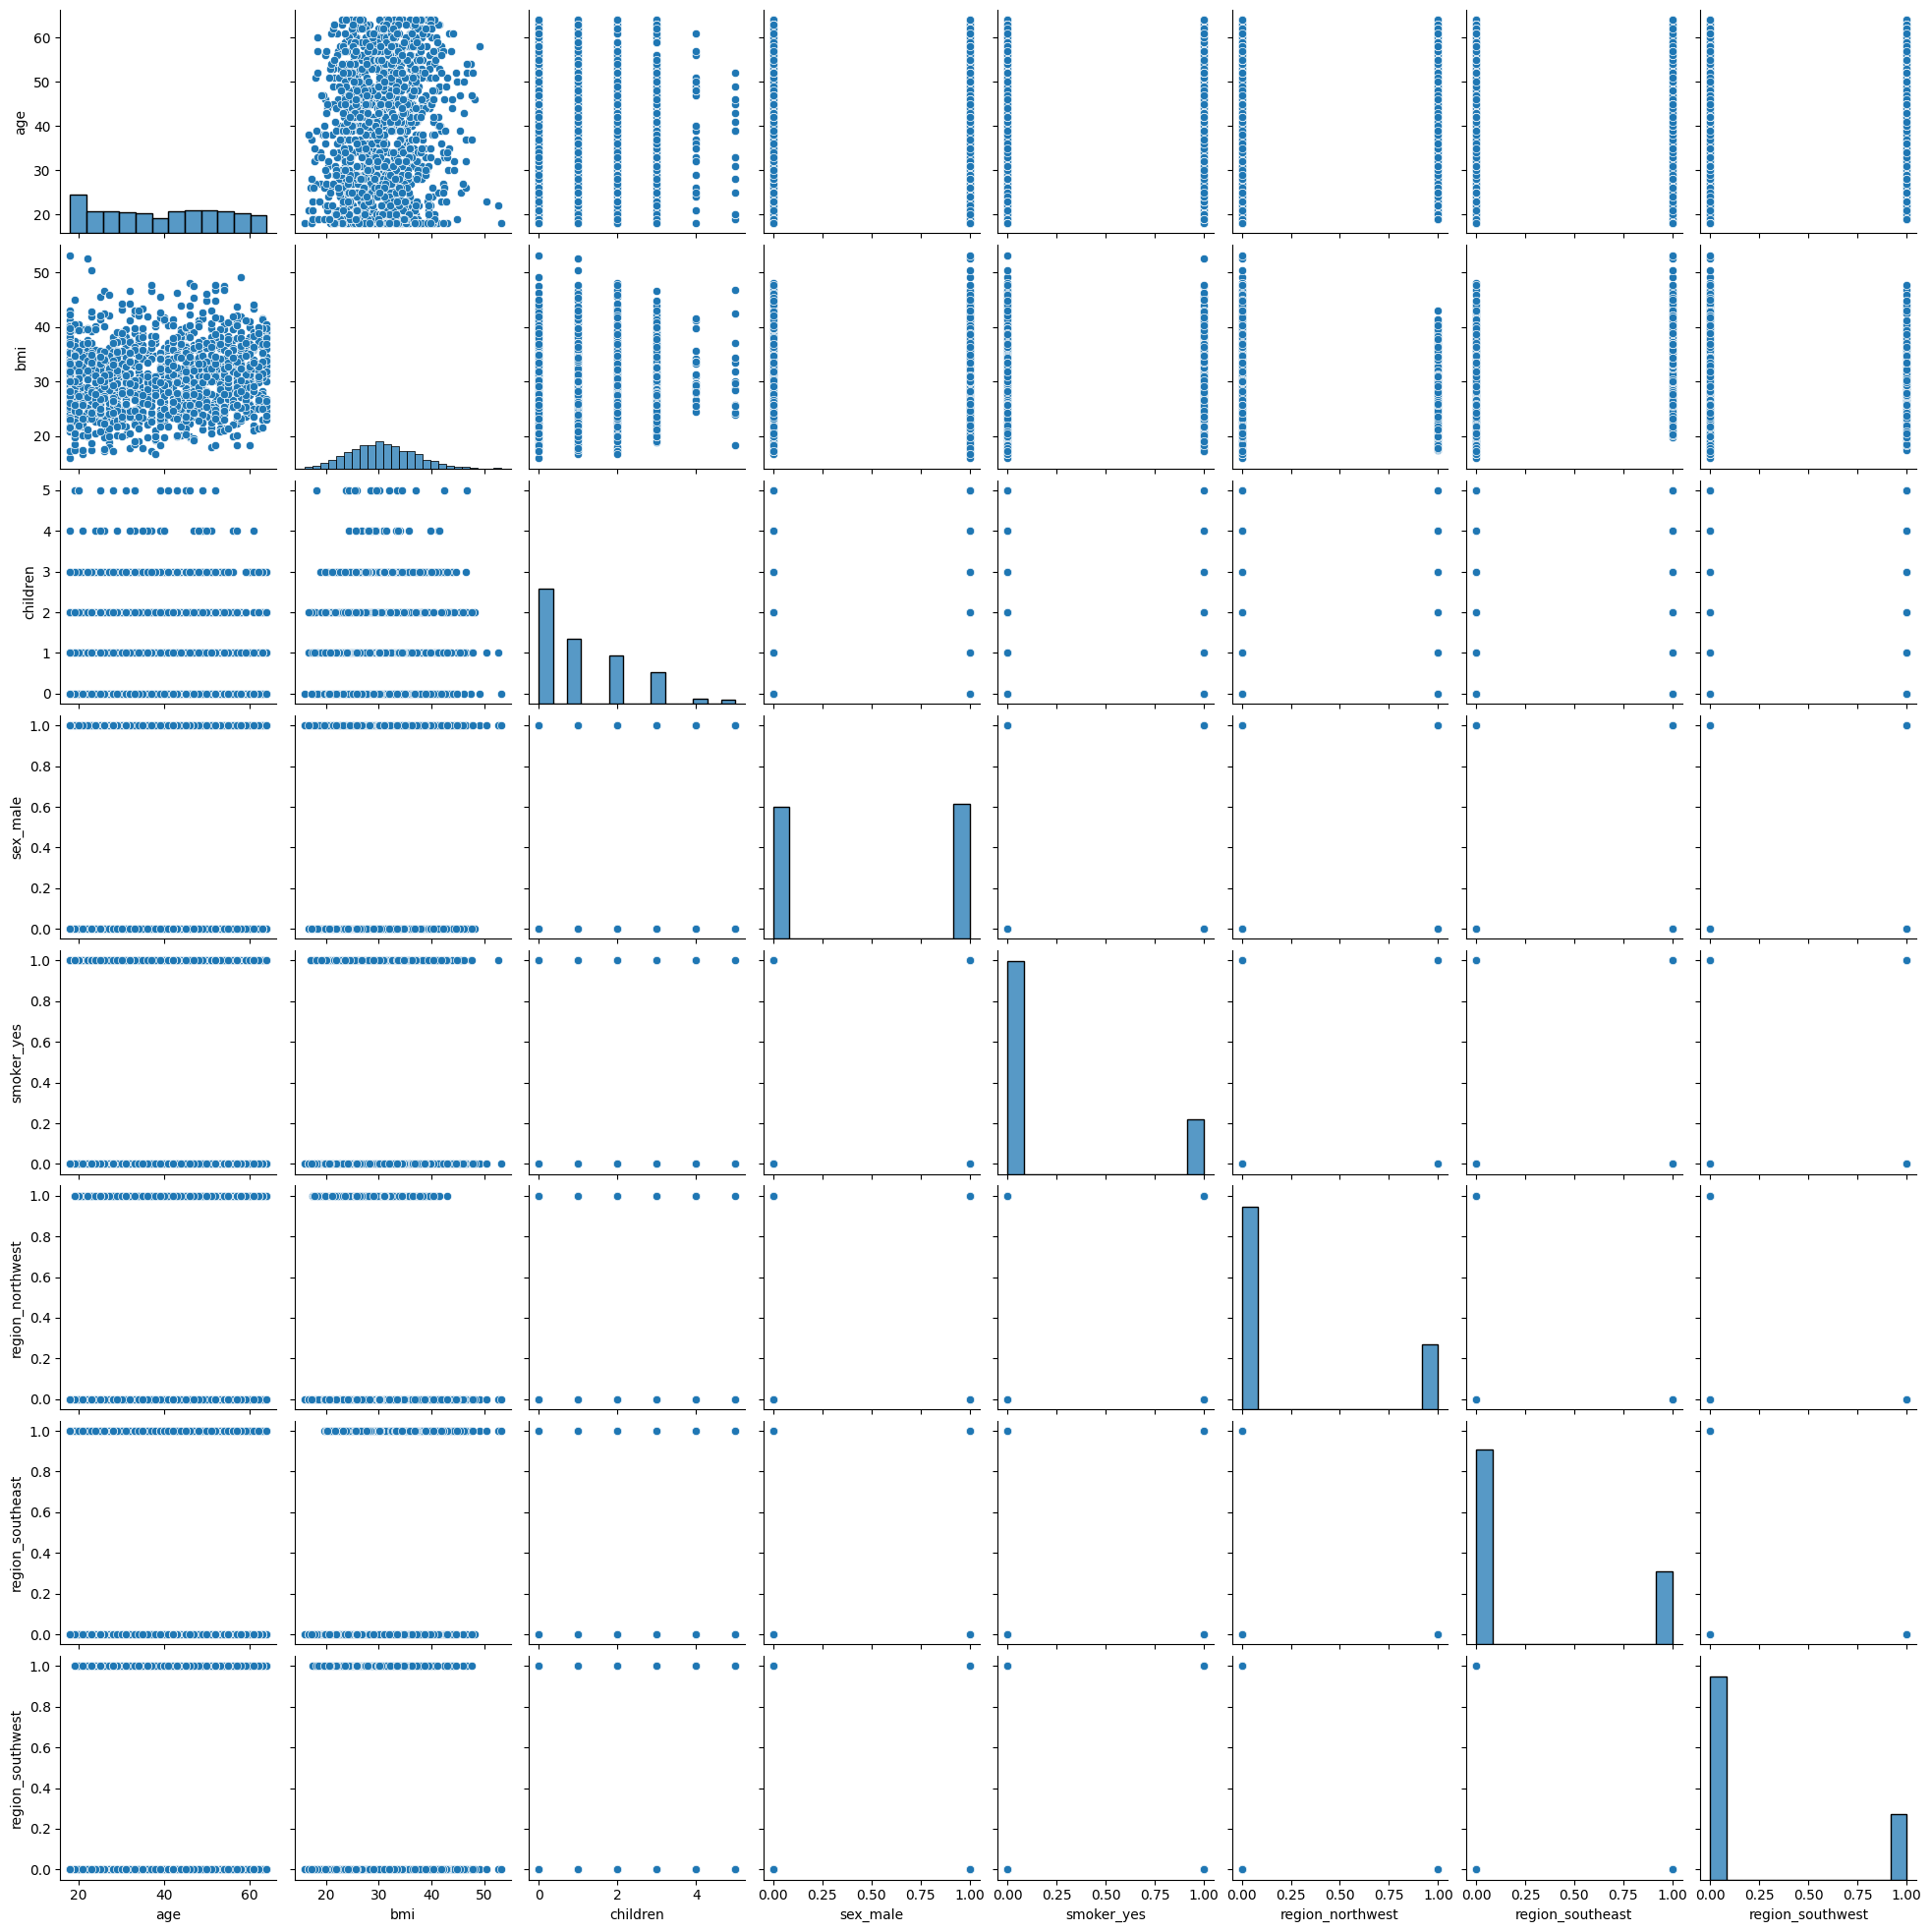

In [69]:
# Check colinearity using Scatterplot matrix (suitable for numeric type)
sns.pairplot(X);

In [70]:
# Check colinearity using Correlation matrix (suitable for numeric type)
round(X.corr(),2) 

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.00,0.11,0.04,-0.02,-0.03,-0.00,-0.01,0.01
bmi,0.11,1.00,0.01,0.05,0.00,-0.14,0.27,-0.01
children,0.04,0.01,1.00,0.02,0.01,0.02,-0.02,0.02
sex_male,-0.02,0.05,0.02,1.00,0.08,-0.01,0.02,-0.00
smoker_yes,-0.03,0.00,0.01,0.08,1.00,-0.04,0.07,-0.04
region_northwest,-0.00,-0.14,0.02,-0.01,-0.04,1.00,-0.35,-0.32
region_southeast,-0.01,0.27,-0.02,0.02,0.07,-0.35,1.00,-0.35
region_southwest,0.01,-0.01,0.02,-0.00,-0.04,-0.32,-0.35,1.00
